[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/imeri-course/ai-in-healthcare/blob/master/Session2/Demo_MLP.ipynb)

**Resources**: <br>
 - [Dataset](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/data)<br>
 - [Breast Cancer Prediction](https://www.kaggle.com/ptynecki)<br>

# Multilayer Perceptron Demo in Breast Cancer Dataset

## About the Breast Cancer Wisconsin Diagnostic Dataset
Breast Cancer Wisconsin Diagnostic Dataset (WDBC) consists of features which were computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. Those features describe the characteristics of the cell nuclei found in the image.

This dataset has 569 instances: 212 - Malignant and 357 - Benign. It consists of 31 attributes including the class attribute. The attributes description is ten real-valued features which are computed for each cell nucleus. These features include: Texture, Radius, Perimeter, Smoothness, Area, Concavity, Compactness, Symmetry, Concave points and Fractal dimension.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis (EDA)

In [2]:
# Download Data
! wget https://raw.githubusercontent.com/imeri-course/ai-in-healthcare/master/Session2/breast_cancer_data.csv

In [3]:
# Load Data
breast_cancer = pd.read_csv('breast_cancer_data.csv')

In [4]:
breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
breast_cancer.shape

(569, 32)

In [7]:
breast_cancer.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
breast_cancer.groupby('diagnosis').size()

diagnosis
B    357
M    212
dtype: int64

### Data Quality Checks

In [9]:
# Check if Any null data
breast_cancer.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [10]:
# Check if any 0 data in any column
for field in breast_cancer.columns:
    amount = sum(breast_cancer[field] == 0)
    if amount > 0:
        print('Number of 0-entries for "{field_name}" feature: {amount}'.format(
            field_name=field,
            amount=amount
        ))

Number of 0-entries for "concavity_mean" feature: 13
Number of 0-entries for "concave points_mean" feature: 13
Number of 0-entries for "concavity_se" feature: 13
Number of 0-entries for "concave points_se" feature: 13
Number of 0-entries for "concavity_worst" feature: 13
Number of 0-entries for "concave points_worst" feature: 13


### Feature Engineering

#### Chose Columns

In [11]:
# Initial Columns
breast_cancer.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [12]:
# Choose Columns after diagnosis
breast_cancer.columns[2:]

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [13]:
# Select Features
feature_names = breast_cancer.columns[2:]
X = breast_cancer[feature_names]

# "diagnosis" feature is our class which I wanna predict
y = breast_cancer['diagnosis']

In [14]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
y.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

#### Transforming the prediction target
Will transform <br>
M -> 1 and B -> 0

In [16]:
from sklearn.preprocessing import LabelEncoder
# Create Object
class_le = LabelEncoder()

# class_le Learn our data
class_le.fit(y)

# Transform all data to number
y = class_le.transform(y)

In [17]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

#### Correlation Matrix
Check The relationships between pairs of variables.

In [18]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [19]:
X.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


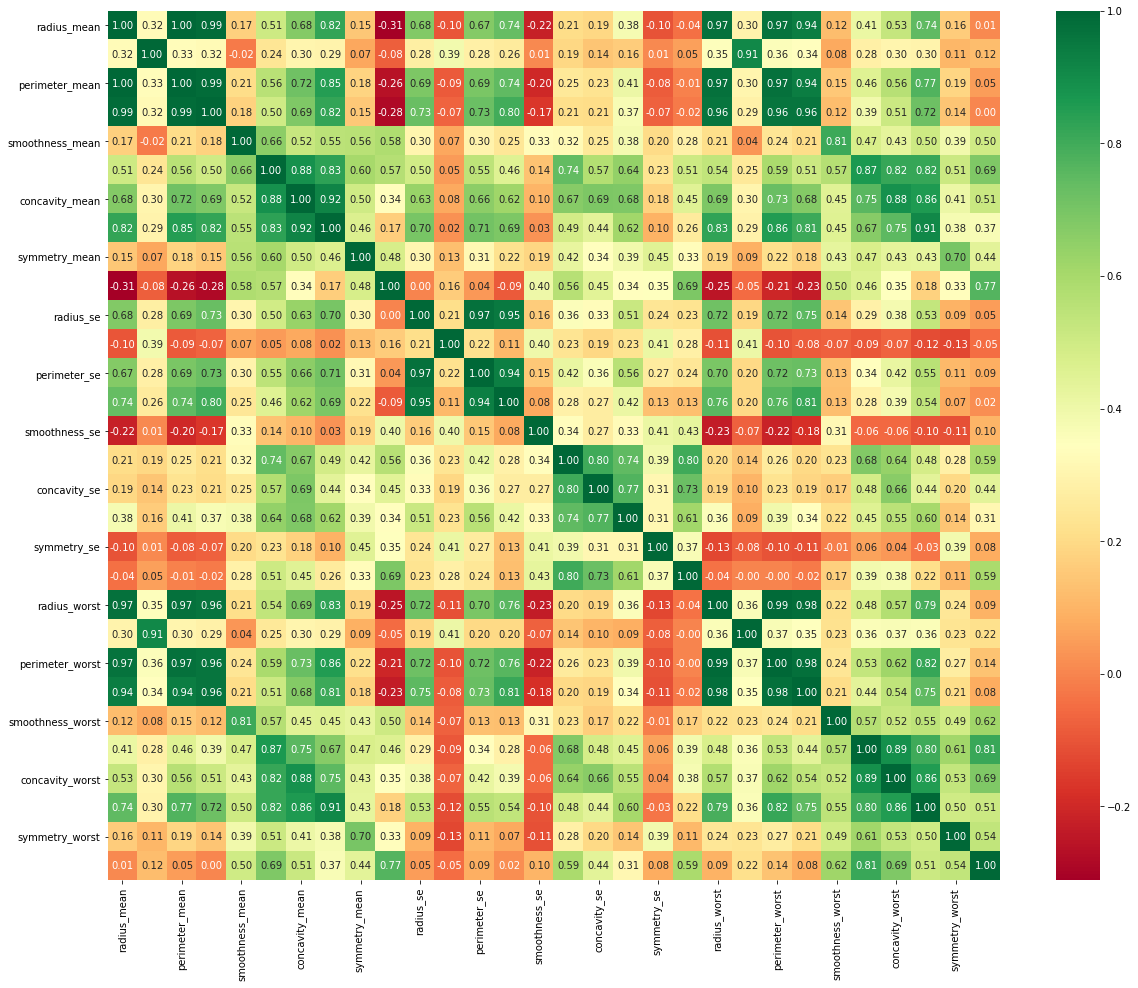

In [20]:
# Plot the correlation

import matplotlib.pyplot as plt
import seaborn as sns

# convert to heatmap
sns.heatmap(
    data=X.corr(),
    annot=True,
    fmt='.2f',
    cmap='RdYlGn'
)

# Configure the plot
fig = plt.gcf()
fig.set_size_inches(20, 16)
plt.show()

In [21]:
## Utils Function
import pandas as pd
def to_dataframe(x, y=None, columns=None):
    """
    Convert data to dataframe, just for preview
    """
    # add data features
    df = pd.DataFrame(x, columns=columns)
    if not y is None:
        # add Target
        df['target'] = y
    return df

### Data Split
Split data into train and test data, to make sure our model not overfit with data train

In [22]:
from sklearn.model_selection import train_test_split
# Split Dataset to train and testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Data Preprocessing
Use standar scale for processing the data <br>
`z = (x - u) / s` <br>
where `u` is the mean of the training samples and `s` is the standard deviation of the training samples

In [23]:
# before Scalling
to_dataframe(x=x_train, columns=feature_names).describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,...,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,14.145886,18.983516,92.047231,655.314945,0.096260,0.103698,0.088788,0.048889,0.180856,0.062622,...,16.277662,25.306374,107.202747,880.951648,0.131896,0.253427,0.273771,0.115331,0.289562,0.083674
std,3.446484,4.053514,23.628575,347.133010,0.013904,0.049450,0.076953,0.037388,0.026997,0.006978,...,4.753964,5.993855,32.818286,566.679789,0.022479,0.151307,0.204018,0.063932,0.062567,0.017997
min,7.729000,9.710000,47.920000,178.800000,0.052630,0.019380,0.000000,0.000000,0.116700,0.049960,...,8.964000,12.020000,57.170000,242.200000,0.071170,0.027290,0.000000,0.000000,0.160300,0.055210
25%,11.755000,16.045000,76.120000,427.000000,0.086025,0.066735,0.031240,0.021495,0.162050,0.057670,...,13.070000,20.870000,84.615000,521.000000,0.116700,0.148600,0.120850,0.067450,0.248750,0.071365
50%,13.450000,18.610000,87.160000,558.100000,0.095970,0.095460,0.063870,0.033900,0.178400,0.061320,...,15.050000,25.160000,98.400000,694.400000,0.131200,0.216400,0.229800,0.101500,0.280400,0.079570
75%,15.740000,21.535000,103.750000,770.050000,0.105400,0.130450,0.125050,0.072020,0.195400,0.065845,...,18.500000,29.055000,123.950000,1039.500000,0.144750,0.339500,0.384100,0.161100,0.318150,0.091825
max,28.110000,33.560000,188.500000,2501.000000,0.142500,0.311400,0.426400,0.187800,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [24]:
from sklearn.preprocessing import StandardScaler

# Create the object scaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(x_train)

StandardScaler()

In [25]:
# Now apply the transformations to the data:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [26]:
# After Scalling
to_dataframe(x=x_train, columns=feature_names).describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,...,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02
mean,-1.756836e-16,4.021203e-16,-4.294489e-16,-2.635255e-16,2.303408e-16,-9.369794e-17,-2.459571e-16,-2.361969e-16,-3.865040e-16,1.834918e-16,...,3.308709e-16,4.040724e-16,-1.395709e-16,-3.708877e-17,-3.318469e-16,-1.171224e-16,3.865040e-16,-1.678755e-16,4.606816e-16,2.889020e-16
std,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,...,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00,1.001101e+00
min,-1.863914e+00,-2.290291e+00,-1.869592e+00,-1.374227e+00,-3.141534e+00,-1.706989e+00,-1.155066e+00,-1.309045e+00,-2.378987e+00,-1.816480e+00,...,-1.540128e+00,-2.219106e+00,-1.526217e+00,-1.128423e+00,-2.704405e+00,-1.496198e+00,-1.343371e+00,-1.805964e+00,-2.068270e+00,-1.583372e+00
25%,-6.944809e-01,-7.257286e-01,-6.748085e-01,-6.584400e-01,-7.369827e-01,-7.483078e-01,-7.486572e-01,-7.334923e-01,-6.973460e-01,-7.103965e-01,...,-6.754767e-01,-7.409683e-01,-6.890247e-01,-6.358932e-01,-6.767623e-01,-6.935706e-01,-7.503706e-01,-7.497699e-01,-6.530189e-01,-6.847185e-01
50%,-2.021340e-01,-9.224778e-02,-2.070633e-01,-2.803593e-01,-2.090945e-02,-1.667831e-01,-3.241660e-01,-4.013346e-01,-9.106536e-02,-1.867641e-01,...,-2.585238e-01,-2.444749e-02,-2.685221e-01,-3.295635e-01,-3.101636e-02,-2.449833e-01,-2.157622e-01,-2.165836e-01,-1.466005e-01,-2.282992e-01
75%,4.630426e-01,6.301427e-01,4.958255e-01,3.308857e-01,6.580821e-01,5.415738e-01,4.717387e-01,6.193707e-01,5.393182e-01,4.623967e-01,...,4.679851e-01,6.261000e-01,5.108642e-01,2.800927e-01,5.724221e-01,5.694872e-01,5.413747e-01,7.166882e-01,4.574214e-01,4.534094e-01
max,4.056158e+00,3.599970e+00,4.086532e+00,5.322791e+00,3.329406e+00,4.204826e+00,4.392070e+00,3.719509e+00,4.566356e+00,4.995045e+00,...,4.161598e+00,4.047529e+00,4.392544e+00,5.958852e+00,4.039410e+00,5.323322e+00,4.800086e+00,2.750782e+00,5.988022e+00,6.888060e+00


## Training MLP Model Use Scikit Learn

### Create Model

Now it is time to train our model. SciKit Learn makes this incredibly easy, by using estimator objects. In this case we will import our estimator (the Multi-Layer Perceptron Classifier model) from the neural_network library of SciKit-Learn!

In [27]:
from sklearn.neural_network import MLPClassifier

Next we create an instance of the model, there are a lot of parameters you can choose to define and customize here, we will only define the hidden_layer_sizes. For this parameter you pass in a tuple consisting of the number of neurons you want at each layer, where the nth entry in the tuple represents the number of neurons in the nth layer of the MLP model. There are many ways to choose these numbers, but for simplicity we will choose 3 layers with the same number of neurons as there are features in our data set:

check for library :
http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [88]:
mlp = MLPClassifier(
    hidden_layer_sizes = (10),
    max_iter=1000,
    alpha=0.1,
    activation='relu',
    solver='adam',
    random_state=42,
    verbose=True,
    learning_rate_init = 0.0001,
)

Other parameter options: <br>
- **max_iter** = 1 - any number <br>
- **activation** : `identity`, `logistic`, `tanh`, `relu` <br>
- **alpha / legularization** = `1e-4`, `1e-3`, `0.01`, `0.1`, `1` , and so on <br>
- **solver / optimizer** = `lbfgs`, `sgd`, `adam` <br>
- **learning_rate_init** = `1e-4`, `1e-3`, `0.01`, `0.1`, `1`, and so on 

### Train

In [89]:
# Let Model Learn the data
mlp.fit(x_train, y_train)

Iteration 1, loss = 0.75255080
Iteration 2, loss = 0.74768668
Iteration 3, loss = 0.74296783
Iteration 4, loss = 0.73824639
Iteration 5, loss = 0.73370197
Iteration 6, loss = 0.72926257
Iteration 7, loss = 0.72474469
Iteration 8, loss = 0.72025106
Iteration 9, loss = 0.71588271
Iteration 10, loss = 0.71155995
Iteration 11, loss = 0.70734669
Iteration 12, loss = 0.70293514
Iteration 13, loss = 0.69886024
Iteration 14, loss = 0.69460333
Iteration 15, loss = 0.69045835
Iteration 16, loss = 0.68641663
Iteration 17, loss = 0.68233734
Iteration 18, loss = 0.67822016
Iteration 19, loss = 0.67430249
Iteration 20, loss = 0.67032194
Iteration 21, loss = 0.66641095
Iteration 22, loss = 0.66254606
Iteration 23, loss = 0.65871928
Iteration 24, loss = 0.65498593
Iteration 25, loss = 0.65124533
Iteration 26, loss = 0.64747631
Iteration 27, loss = 0.64385389
Iteration 28, loss = 0.64022612
Iteration 29, loss = 0.63661791
Iteration 30, loss = 0.63298538
Iteration 31, loss = 0.62946239
Iteration 32, los

MLPClassifier(alpha=0.1, hidden_layer_sizes=10, learning_rate_init=0.0001,
              max_iter=1000, random_state=42, verbose=True)

#### Results

##### Predict

In [90]:
# Let's Predict data test
mlp_predict = mlp.predict(x_test)
mlp_predict

array([1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0])

##### Check Probability each prediction

In [91]:
# Let's check the probability
mlp_predict_proba = mlp.predict_proba(x_test)[:, 1]
mlp_predict_proba

array([9.99949377e-01, 6.23453253e-03, 7.85436539e-01, 5.84983077e-05,
       8.23898338e-01, 9.99751483e-01, 4.95740264e-02, 1.72656311e-02,
       4.76454930e-03, 2.18318044e-04, 3.36177781e-03, 1.82599002e-01,
       9.99990315e-01, 9.54581185e-01, 6.83213228e-03, 3.49753387e-02,
       2.97843393e-03, 9.99225369e-01, 1.37053484e-02, 1.61314282e-02,
       4.12193987e-04, 1.38094105e-02, 9.98835366e-01, 9.83248959e-01,
       1.59241696e-01, 2.01698484e-03, 2.70540477e-01, 7.95931414e-01,
       9.92870943e-01, 5.42368900e-02, 1.33808507e-02, 9.20730914e-01,
       3.23582806e-02, 3.51522491e-01, 1.72840862e-04, 7.68684487e-03,
       9.88518134e-01, 9.99998843e-01, 3.66437029e-02, 3.87855630e-03,
       7.95651067e-02, 6.11933086e-01, 9.93724529e-01, 6.09482496e-02,
       5.24075920e-01, 2.02447151e-02, 9.40482119e-03, 9.33199379e-01,
       1.14044131e-03, 7.58274604e-03, 9.95736487e-01, 8.62850873e-03,
       1.97075666e-03, 9.18558548e-03, 3.51616646e-02, 1.18384596e-03,
      

##### Model Performance

Scikit learn have bundle of metrics for calculate model performance <br>
Check the library : https://scikit-learn.org/stable/modules/model_evaluation.html

In [92]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report

##### General Report

In [98]:
print(classification_report(y_test, mlp_predict))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        68
           1       0.98      0.96      0.97        46

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



##### Accuracy

In [99]:
print(accuracy_score(y_test, mlp_predict) * 100)

97.36842105263158


##### Training Vs Testing 

In [101]:
# Training
print(mlp.score(x_train, y_train) * 100)

96.04395604395604


In [102]:
# Testing
print(mlp.score(x_test, y_test) * 100)

97.36842105263158


In [49]:
assert False, "Stop For run Through"

AssertionError: Stop For run Through

## Training MLP Model Use Pytorch

In [50]:
# Import Modules
import torch
import torchvision

# random seed for reusable training
random_seed = 1
torch.manual_seed(random_seed)
torch.backends.cudnn.enabled = False

### Dataset to dataloader

Sometimes one epoch is too big to feed to the computer at once we divide it in several smaller batches. <br>
`Epoch` = **One Epoch** is when an **ENTIRE dataset** is passed **forward** and **backward** through the neural network **only ONCE**. <br>
`Batch Size` = Total number of training examples present **in a single batch**.

In [51]:
import torch
import numpy as np
from torch.utils.data import TensorDataset, DataLoader

def create_data_loader(x, y, batch_size):
    """
    Function to create data loader, split full data to minibatch
    ex(batch_size=2): [1,2,3,4,5,6,7,8] --> [[1,2], [3,4], [5,6], [7,8]]
    """
    # Convert numpy data to torch tensor
    x_tensor = torch.Tensor(x)
    y_tensor = torch.Tensor(y)
    
    # Create tensordataset
    dataset = TensorDataset(x_tensor, y_tensor)
    
    # Create Dataloader with batch_size
    data_loader = DataLoader(dataset, batch_size=batch_size)
    
    return data_loader

# Parameter batch_size
train_batch_size = 1000
test_batch_size = 1000

train_data_loader = create_data_loader(x=x_train, y=y_train, batch_size=train_batch_size)
test_data_loader = create_data_loader(x=x_test, y=y_test, batch_size=test_batch_size)

In [52]:
# get sample data
examples = enumerate(train_data_loader)
batch_idx, (example_data, example_targets) = next(examples)

In [53]:
# Data Training Shape
example_data.shape

torch.Size([455, 30])

In [54]:
# Target Training Shape
example_targets.shape

torch.Size([455])

### Models

In [55]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np

![MLP](https://www.researchgate.net/profile/Nicolas_Yu/publication/316615322/figure/fig1/AS:512951140483072@1499308491041/MLP-with-one-hidden-layer-It-consists-of-three-layers-the-input-layer-the-hidden-layer.png "MLP")

In [56]:
class Net(nn.Module):
    """
    Single Hidden Layer Network
    """
    def __init__(self, input_shape, output_class, hidden_nodes):
        """
        Args:
            input_shape: Shape of data
            output_class: number of output class data
            hidden_nodes: number of hidden nodes in each layer 
        """
        
        # Init
        super(Net,self).__init__()
        self.input_shape = input_shape
        self.output_class = output_class
        self.hidden_nodes = hidden_nodes
        
        # linear layer (input_shape -> hidden_nodes)
        self.fc1 = nn.Linear(input_shape, hidden_nodes)
        
        # linear layer (hidden_nodes -> output_class)
        self.fc2 = nn.Linear(hidden_nodes, output_class)
        
        
    def forward(self,x):
        # flatten image input
        x = x.view(-1, self.input_shape)
        
        # add hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        
        # add output layer
        x = self.fc2(x)
        
        return x

### Init Network

In [57]:
network = Net(input_shape=30, output_class=1, hidden_nodes=10)

# with Cuda Gpu Acceleration
if torch.cuda.is_available():
    network.cuda()

### Set the Optimizer
- [Simple theory of Optimizers](https://medium.com/datadriveninvestor/overview-of-different-optimizers-for-neural-networks-e0ed119440c3)
- [Torch optimizer documents](https://pytorch.org/docs/stable/optim.html)

In [58]:
learning_rate = 0.0001
optimizer = optim.Adam(network.parameters(), lr=learning_rate)

### Criterion
- [A brief overview of loss function in pytorch](https://medium.com/udacity-pytorch-challengers/a-brief-overview-of-loss-functions-in-pytorch-c0ddb78068f7)
- [Torch Loss Function list](https://pytorch.org/docs/stable/nn.html#loss-functions)

In [59]:
criterion = nn.BCEWithLogitsLoss() # nn.CrossEntropyLoss() #  nn.MSELoss() # nn.SmoothL1Loss() # nn.NLLLoss()

### Training

In [60]:
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))
    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)
    return acc


def one_epoch_train(network, optimizer, data_loader):
    """
    One Epoch Training Function
    """
    # init arrays
    acc_epoch = np.zeros(len(data_loader))
    loss_epoch = np.zeros(len(data_loader))
    
    # Set to Train mode on
    network.train() 
    # Start Training
    for batch_idx, (data, target) in enumerate(data_loader):
        
        # Convert data and target to cuda datatype
        if torch.cuda.is_available():
            data = data.cuda()
            target = target.cuda()
        
        # Main Training Process
        optimizer.zero_grad() # Clear all Gradient in Optimizer
        output = network(data) # Forward Propagation
        loss = criterion(output.view(-1), target) # Calculcate loss between forward result and target
        loss.backward() # Backward Propagation
        optimizer.step() # Update Gradient in Optimizer
        
        # Put loss and accuracy to arrays
        loss_epoch[batch_idx] = loss.item()
        acc_epoch[batch_idx] = binary_acc(output.view(-1), target)
        
    return loss_epoch.mean(), acc_epoch.mean()

def one_epoch_test(network, optimizer, data_loader):
    """
    One Epoch Testing Function
    """
    # init arrays
    acc_epoch = np.zeros(len(data_loader))
    loss_epoch = np.zeros(len(data_loader))
    
    # Set to Train mode of
    network.eval()
    
    # Should deactivate all gradient proccess
    with torch.no_grad():
        for batch_idx, (data, target) in enumerate(data_loader):

            # Convert data and target to cuda datatype
            if torch.cuda.is_available():
                data = data.cuda()
                target = target.cuda()

            # Main Training Process
            output = network(data) # Only Forward Propagation
            loss = criterion(output.view(-1), target) # Calculcate loss between forward result and target

            # Put loss and accuracy to arrays
            loss_epoch[batch_idx] = loss.item()
            acc_epoch[batch_idx] = binary_acc(output.view(-1), target)
        
    return loss_epoch.mean(), acc_epoch.mean()

In [61]:
n_epochs = 1000
log_interval = 50

train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)
train_accs = np.zeros(n_epochs)
test_accs = np.zeros(n_epochs)

for epoch in range(n_epochs):
    train_loss, train_acc = one_epoch_train(network, optimizer, train_data_loader)
    test_loss, test_acc = one_epoch_test(network, optimizer, test_data_loader)
    
    train_losses[epoch] = train_loss
    test_losses[epoch] = test_loss
    train_accs[epoch] = train_acc
    test_accs[epoch] = test_acc
    if epoch % log_interval == 0:
        print('Train Epoch: {}/{} \t loss(train | test): {:.6f} | {:.6f} \t acc(train|test): {:.0f}% | {:.0f}%'.format(epoch, n_epochs, train_loss, test_loss, train_acc, test_acc))

Train Epoch: 0/1000 	 loss(train | test): 0.706233 | 0.713681 	 acc(train|test): 44% | 46%
Train Epoch: 50/1000 	 loss(train | test): 0.674574 | 0.673530 	 acc(train|test): 62% | 64%
Train Epoch: 100/1000 	 loss(train | test): 0.644045 | 0.636486 	 acc(train|test): 80% | 83%
Train Epoch: 150/1000 	 loss(train | test): 0.614114 | 0.600767 	 acc(train|test): 86% | 88%
Train Epoch: 200/1000 	 loss(train | test): 0.584132 | 0.565531 	 acc(train|test): 90% | 91%
Train Epoch: 250/1000 	 loss(train | test): 0.554094 | 0.531058 	 acc(train|test): 92% | 93%
Train Epoch: 300/1000 	 loss(train | test): 0.524681 | 0.497768 	 acc(train|test): 93% | 94%
Train Epoch: 350/1000 	 loss(train | test): 0.495845 | 0.465852 	 acc(train|test): 94% | 95%
Train Epoch: 400/1000 	 loss(train | test): 0.468536 | 0.435798 	 acc(train|test): 95% | 95%
Train Epoch: 450/1000 	 loss(train | test): 0.442610 | 0.407762 	 acc(train|test): 95% | 95%
Train Epoch: 500/1000 	 loss(train | test): 0.418087 | 0.381440 	 acc(tra

### Plot Results

In [62]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

def plot_(train, test, xlabel="epoch", ylabel="loss", title="Result Training", rolling=20):
    """
    Function for plot the result
    """
    df = pd.DataFrame()
    df['train'] = train
    df['test'] = test
    df = df.rolling(rolling).mean()
    sns.lineplot(hue="region", style="event",data=df)
    # other info
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

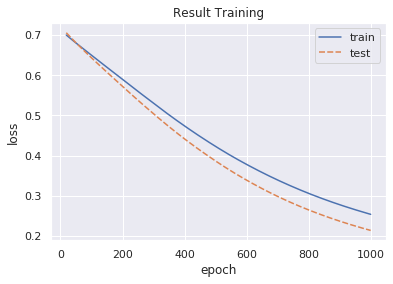

In [63]:
# Check Loss
plot_(train_losses, test_losses)

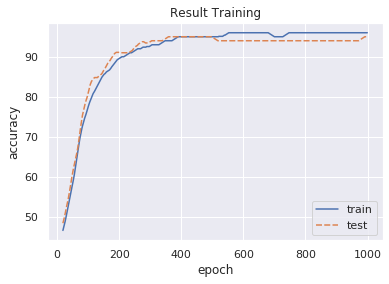

In [64]:
# Check accuracy
plot_(train_accs, test_accs, ylabel="accuracy")

# Home Work Challenge !
## Rules:
- Get accuracy more than **98%** (train and test)
- Not overfit with data train
- Only use "Multi-Layer Perceptron" models,  on your Network
- Can change:
   - loss function
   - learning rate
   - optimizer
   - network configuration (hidden layer, add nn.Linear, etc)
   - etc, except above restriction